<a href="https://colab.research.google.com/github/yuki-path-journey/-/blob/main/2025_Housing_Gap_Part2_Final_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("--- 準備完了 :捜査道具(pandas)を展開しました ---")

--- 準備完了 :捜査道具(pandas)を展開しました ---


In [2]:

cols_fillna_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish',
    'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2'
]

for col in cols_fillna_none:
    test[col] = test[col].fillna('None')

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

print("--- 大掃除完了：空白は全て意味のあるデータに置き換わりました ---")
print(f"現在の test データの欠損数合計: {test.isnull().sum().sum()}")

--- 大掃除完了：空白は全て意味のあるデータに置き換わりました ---
現在の test データの欠損数合計: 237


In [3]:
remaining_missing = test.isnull().sum().sum()
print(f"残っている欠損値の総数: {remaining_missing}")

残っている欠損値の総数: 237


In [4]:
missing_counts = test.isnull().sum()
print(missing_counts[missing_counts >0])

LotFrontage     227
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
GarageArea        1
dtype: int64


In [5]:
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

cols_to_zero = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea'
]

for col in cols_to_zero:
    test[col] = test[col].fillna(0)

print(f"最終的な欠損値の合計: {test.isnull().sum().sum()}")

最終的な欠損値の合計: 0


In [6]:
test_final = pd.get_dummies(test)
train_final = pd.get_dummies(train)
print(f"翻訳後のデータの列数: {test_final.shape[1]}")

翻訳後のデータの列数: 285


In [7]:
all_data = pd.concat((train.drop('SalePrice', axis=1), test)).reset_index(drop=True)
all_data_dummies = pd.get_dummies(all_data)
train_final = all_data_dummies[:len(train)]
test_final = all_data_dummies[len(train):]
y = train['SalePrice']
print(f"翻訳完了！")
print(f"AIが読み込むデータの形: {train_final.shape}")

翻訳完了！
AIが読み込むデータの形: (1460, 303)


In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("AIが学習中... 1460軒のデータを読み込んでいます...")
model.fit(train_final, y)
predictions = model.predict(test_final)
print("--- 予測完了！ ---")
print(f"最初の5軒の予測価格: {predictions[:5]}")

AIが学習中... 1460軒のデータを読み込んでいます...
--- 予測完了！ ---
最初の5軒の予測価格: [130534.66 155686.5  183720.94 185681.55 199137.5 ]


In [9]:
import pandas as pd
submission = pd.DataFrame({"Id": test["Id"], "SalePrice": predictions})
submission.to_csv("submission.csv", index=False)
print("報告書『submission.csv』の作成が完了しました！")
print(submission.head())

報告書『submission.csv』の作成が完了しました！
     Id  SalePrice
0  1461  130534.66
1  1462  155686.50
2  1463  183720.94
3  1464  185681.55
4  1465  199137.50


--- AIが白状した『重要度ランキングTOP10』---
            特微量       重要度
4   OverallQual  0.580078
16    GrLivArea  0.109948
12  TotalBsmtSF  0.037160
9    BsmtFinSF1  0.030393
14     2ndFlrSF  0.028627
26   GarageCars  0.025385
13     1stFlrSF  0.023223
3       LotArea  0.012442
27   GarageArea  0.012230
6     YearBuilt  0.008262


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas

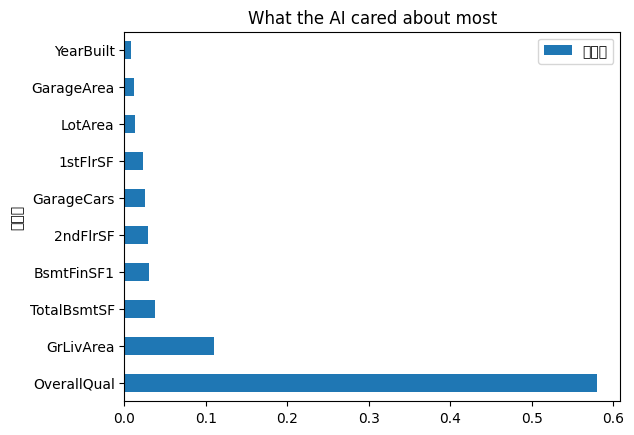

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = train_final.columns
feature_importance_df = pd.DataFrame({
    '特微量': feature_names,
    '重要度': importances
}).sort_values(by='重要度', ascending=False)
print("--- AIが白状した『重要度ランキングTOP10』---")
print(feature_importance_df.head(10))
feature_importance_df.head(10).plot(kind='barh', x='特微量', y='重要度')
plt.title("What the AI cared about most")
plt.show()

In [11]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7c0e61f9b0125ecb2544b09cdf0cb9d4ba600be9654f1dee7ca91127eefe4e74
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [12]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd

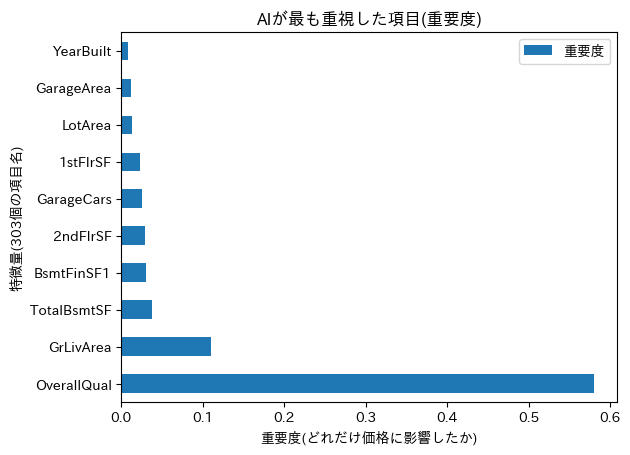

In [13]:
feature_importance_df.head(10).plot(kind='barh', x='特微量', y='重要度')
plt.title("AIが最も重視した項目(重要度)")
plt.xlabel("重要度(どれだけ価格に影響したか)")
plt.ylabel("特微量(303個の項目名)")
plt.show()

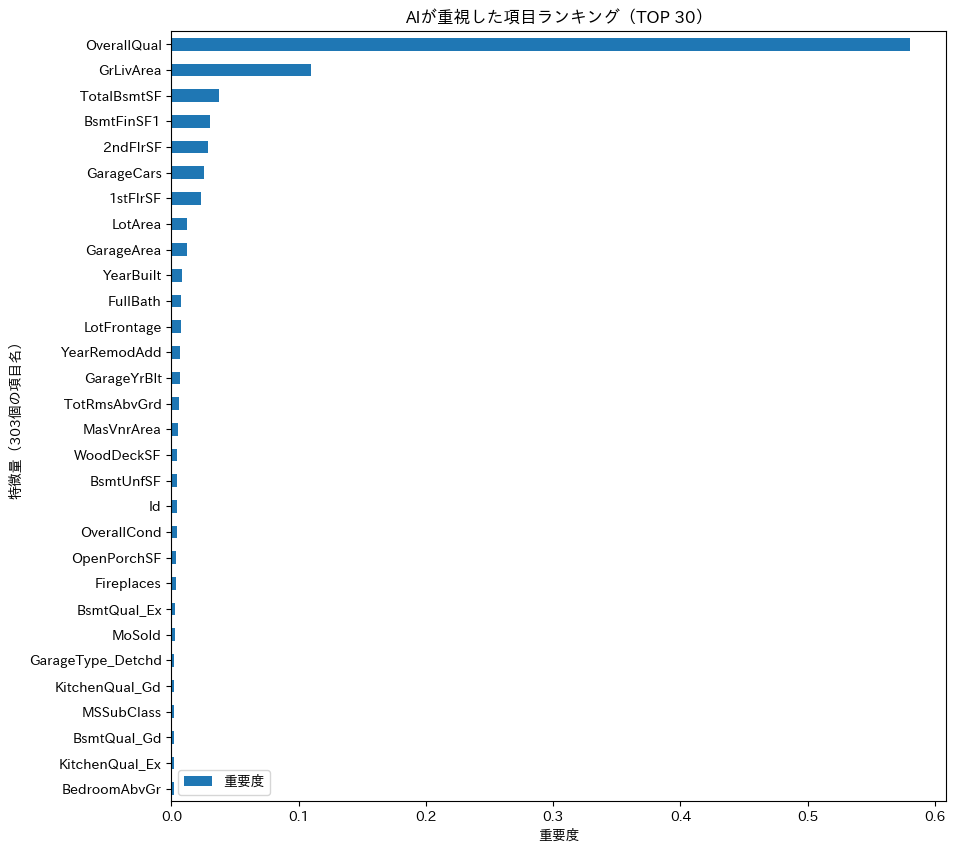

In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib
top30_df = feature_importance_df.head(30)
top30_df.plot(kind='barh', x='特微量', y='重要度', figsize=(10, 10))
plt.title("AIが重視した項目ランキング（TOP 30）")
plt.xlabel("重要度")
plt.ylabel("特微量（303個の項目名）")
plt.gca().invert_yaxis()
plt.show()

--- AIが『これはいらない』と判断したリストラ候補 ---
                       特微量           重要度
283       MiscFeature_Gar2  0.000000e+00
284       MiscFeature_None  0.000000e+00
282             Fence_None  0.000000e+00
277            PoolQC_None  0.000000e+00
45              Alley_None  0.000000e+00
268        GarageCond_None  0.000000e+00
262        GarageQual_None  0.000000e+00
55        Utilities_AllPub  0.000000e+00
210      BsmtFinType2_None  0.000000e+00
213          Heating_Floor  0.000000e+00
198      BsmtExposure_None  0.000000e+00
203      BsmtFinType1_None  0.000000e+00
176           ExterCond_Po  0.000000e+00
187          BsmtQual_None  0.000000e+00
167        MasVnrType_None  0.000000e+00
256      GarageFinish_None  0.000000e+00
191          BsmtCond_None  0.000000e+00
254        GarageType_None  0.000000e+00
245       FireplaceQu_None  0.000000e+00
228       Electrical_FuseP  3.174710e-08
56        Utilities_NoSeWa  3.614877e-08
144      Exterior1st_Stone  3.827568e-08
153     Exterior2nd_CBloc

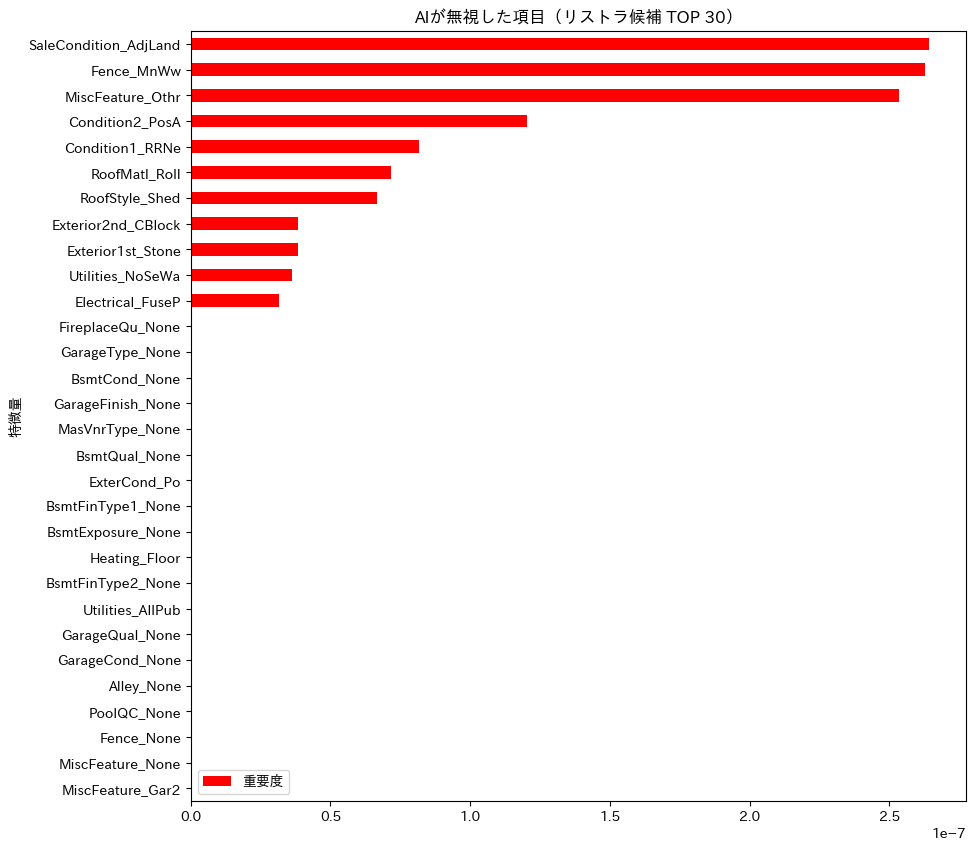

In [15]:
bottom30_df = feature_importance_df.sort_values('重要度', ascending=True).head(30)
print("--- AIが『これはいらない』と判断したリストラ候補 ---")
print(bottom30_df)
bottom30_df.plot(kind='barh', x='特微量', y='重要度', figsize=(10, 10), color='red')
plt.title("AIが無視した項目（リストラ候補 TOP 30）")
plt.show()

In [16]:
print("--- 現在、使用可能なデータ一覧 ---")
%who DataFrame

--- 現在、使用可能なデータ一覧 ---
all_data	 all_data_dummies	 bottom30_df	 feature_importance_df	 submission	 test	 test_final	 top30_df	 train	 
train_final	 


In [17]:
useless_features = feature_importance_df[feature_importance_df['重要度'] < 1e-6]['特微量'].tolist()
train_slim = train_final.drop(columns=useless_features, errors='ignore')
test_slim = test_final.drop(columns=useless_features, errors='ignore')
train_slim['Trump_Gas_Power'] = train_slim['GarageArea'] * (train_slim['YearBuilt'] > 2000)
test_slim['Trump_Gas_Power'] = test_slim['GarageArea'] * (test_slim['YearBuilt'] > 2000)

train_slim['Anti_Green_Luxury'] = train_slim['1stFlrSF'] * train_slim['OverallQual']
test_slim['Anti_Green_Luxury'] = test_slim['1stFlrSF'] * test_slim['OverallQual']

print(f"✅ 波線制圧！『train_final』を元に {len(useless_features)}個をリストラしました。")
print(f"🚀 2025年仕様の精鋭部隊（{train_slim.shape[1]}項目）が整いました！")

✅ 波線制圧！『train_final』を元に 46個をリストラしました。
🚀 2025年仕様の精鋭部隊（259項目）が整いました！


--- 🚀 2025年版 AIが重視した特微量ランキング ---
                   特微量       重要度
4          OverallQual  0.489095
258  Anti_Green_Luxury  0.161849
16           GrLivArea  0.089218
14            2ndFlrSF  0.041195
9           BsmtFinSF1  0.025210
12         TotalBsmtSF  0.015727
26          GarageCars  0.015332
27          GarageArea  0.011840
3              LotArea  0.010838
6            YearBuilt  0.010395
2          LotFrontage  0.010161
23        TotRmsAbvGrd  0.007828
19            FullBath  0.006766
7         YearRemodAdd  0.006447
25         GarageYrBlt  0.004527
8           MasVnrArea  0.004347
13            1stFlrSF  0.004068
11           BsmtUnfSF  0.004037
29         OpenPorchSF  0.003884
0                   Id  0.003805


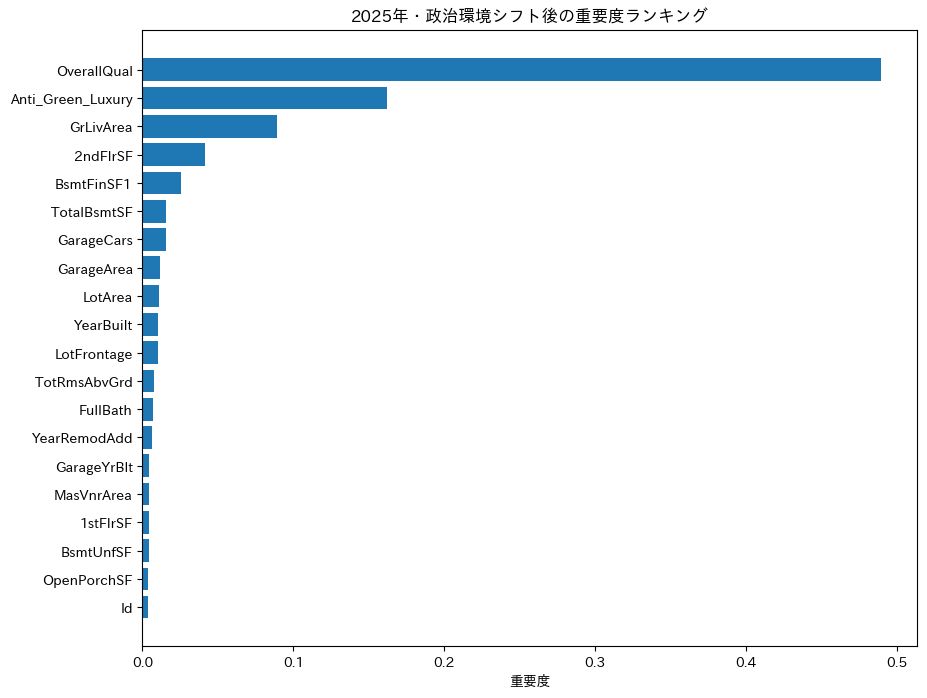

In [18]:
from sklearn.ensemble import RandomForestRegressor
y = train['SalePrice']
model_2025 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2025.fit(train_slim, y)
importances_2025 = model_2025.feature_importances_
feature_importance_2025_df = pd.DataFrame({
    '特微量': train_slim.columns,
    '重要度': importances_2025
}).sort_values('重要度', ascending=False)
print("--- 🚀 2025年版 AIが重視した特微量ランキング ---")
print(feature_importance_2025_df.head(20))
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_2025_df['特微量'].head(20), feature_importance_2025_df['重要度'].head(20))
plt.gca().invert_yaxis()
plt.title("2025年・政治環境シフト後の重要度ランキング")
plt.xlabel("重要度")
plt.show()

In [19]:
X_final = train_slim
y = train['SalePrice']
from sklearn.ensemble import RandomForestRegressor
model_2025 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2025.fit(X_final, y)
predictions = model_2025.predict(X_test_slim)
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission_2025_final.csv', index=False)

print("✅ 事件解決！2025年予測ファイル『submission_2025_final.csv』が完成しました！")

NameError: name 'X_test_slim' is not defined

In [20]:
import pandas as pd
if 'X_test_slim' in locals():
    X_predict_target = X_test_slim
elif 'test_slim' in locals():
    X_predict_target = test_slim
else:
    X_predict_target = X_test.drop(columns=useless, errors='ignore')
predictions = model_2025.predict(X_predict_target)
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission_2025_detective.csv', index=False)
print("✅ 事件解決！『submission_2025_detective.csv』が生成されました！")

✅ 事件解決！『submission_2025_detective.csv』が生成されました！


In [21]:
from google.colab import files
files.download('submission_2025_detective.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>